In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [207]:
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [232]:
TCGA_GBM_LGG_Mutations_all = pd.read_csv('/content/drive/My Drive/Colab Notebooks/TCGA_GBM_LGG_Mutations_all.csv')

# Информация о наборе данных
## С какой целью был создан набор данных?
Глиомы являются наиболее распространенными первичными опухолями мозга.  
Они могут быть классифицированы как LGG (низкоуровневая глиома) или **GBM** (мультиформная глиобластома) в зависимости от гистологических/визуализационных критериев.  
Клинические и молекулярные/мутационные факторы также очень важны для процесса классификации.  
Молекулярные тесты дороги, чтобы помочь точно диагностировать пациентов с глиомой.

В этом наборе данных рассматриваются наиболее часто мутирующие 20 генов и 3 клинических признака из проектов глиомы мозга **TCGA-LGG** и **TCGA-GBM**.

**Задача прогнозирования** заключается в том, чтобы определить, является ли пациент **LGG** или **GBM** с заданными клиническими и молекулярными/мутационными признаками.  
**Основная цель** заключается в том, чтобы найти оптимальный подмножество генов мутаций и клинических признаков для процесса классификации глиомы, чтобы улучшить производительность и сократить расходы.


## Что представляют собой экземпляры в этом наборе данных?

В этом наборе данных экземпляры представляют собой записи пациентов с глиомой мозга.  
Набор данных был создан на основе проектов глиомы мозга **TCGA-LGG** и **TCGA-GBM**.

Каждая запись характеризуется 20 молекулярными признаками (каждый из которых может быть мутированным или немутированным (дикий тип) в зависимости от **Case_ID** TCGA) и 3 клиническими признаками (касающимися демографических данных пациента).

- В файле есть 23 случая, когда значения признаков **Gender**, **Age_at_diagnosis** или **Race** равны «--» или «не сообщено».

Ниже приведен список дополнительных столбцов исходного файла набора данных (и их соответствующее описание):
- Столбец **Project** представляет соответствующие названия проектов **TCGA-LGG** или **TCGA-GBM**.
- Столбец **Case_ID** ссылается на связанную информацию о **Case_ID** проекта.
- Столбец **Primary_Diagnosis** содержит информацию, связанную с типом первичной диагностики.
- Несмотря на то, что они присутствуют в исходном наборе данных, мы не включаем столбцы **Project**, **Case_ID** и **Primary_Diagnosis** в обработанный набор данных.

In [233]:
TCGA_GBM_LGG_Mutations_all.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [234]:
TCGA_GBM_LGG_Mutations_all.shape

(862, 27)

In [235]:
TCGA_GBM_LGG_Mutations_all.describe(include=['O'])

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,862,862,862,862,862,862,862,862,862,862,...,862,862,862,862,862,862,862,862,862,862
unique,2,2,862,3,838,7,6,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,LGG,TCGA-LGG,TCGA-DU-8164,Male,--,Glioblastoma,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
freq,499,499,1,499,5,360,766,448,508,642,...,815,821,824,833,834,834,835,839,839,840


In [236]:
TCGA_GBM_LGG_Mutations_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Grade              862 non-null    object
 1   Project            862 non-null    object
 2   Case_ID            862 non-null    object
 3   Gender             862 non-null    object
 4   Age_at_diagnosis   862 non-null    object
 5   Primary_Diagnosis  862 non-null    object
 6   Race               862 non-null    object
 7   IDH1               862 non-null    object
 8   TP53               862 non-null    object
 9   ATRX               862 non-null    object
 10  PTEN               862 non-null    object
 11  EGFR               862 non-null    object
 12  CIC                862 non-null    object
 13  MUC16              862 non-null    object
 14  PIK3CA             862 non-null    object
 15  NF1                862 non-null    object
 16  PIK3R1             862 non-null    object
 1

In [237]:
TCGA_GBM_LGG_Mutations_all.loc[TCGA_GBM_LGG_Mutations_all.Race == '--']

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
41,LGG,TCGA-LGG,TCGA-R8-A6YH,--,--,--,--,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
671,GBM,TCGA-GBM,TCGA-28-2501,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
706,GBM,TCGA-GBM,TCGA-28-2510,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
794,GBM,TCGA-GBM,TCGA-16-1048,--,--,--,--,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [238]:
TCGA_GBM_LGG_Mutations_all.loc[TCGA_GBM_LGG_Mutations_all.Race == 'not reported'].head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
71,LGG,TCGA-LGG,TCGA-CS-6290,Male,31 years 344 days,"Astrocytoma, anaplastic",not reported,MUTATED,MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
163,LGG,TCGA-LGG,TCGA-DB-A64Q,Female,31 years 315 days,Mixed glioma,not reported,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
208,LGG,TCGA-LGG,TCGA-RY-A840,Male,47 years 335 days,"Oligodendroglioma, anaplastic",not reported,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
231,LGG,TCGA-LGG,TCGA-VM-A8CB,Male,33 years 287 days,"Oligodendroglioma, anaplastic",not reported,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
256,LGG,TCGA-LGG,TCGA-VV-A86M,Female,36 years 304 days,"Astrocytoma, anaplastic",not reported,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


# Удаление пропусков и лишних колонок

In [239]:
TCGA_GBM_LGG_Mutations_all = TCGA_GBM_LGG_Mutations_all.drop(['Project', 'Case_ID', 'Primary_Diagnosis'], axis=1)

*Удалим все строки, где есть '--' и 'not reported'*

In [240]:
TCGA_GBM_LGG_Mutations_all = TCGA_GBM_LGG_Mutations_all.loc[TCGA_GBM_LGG_Mutations_all.Race != 'not reported']
TCGA_GBM_LGG_Mutations_all = TCGA_GBM_LGG_Mutations_all.loc[TCGA_GBM_LGG_Mutations_all.Race != '--']
TCGA_GBM_LGG_Mutations_all = TCGA_GBM_LGG_Mutations_all.loc[TCGA_GBM_LGG_Mutations_all.Age_at_diagnosis != '--']

# Заменим категориальные данные на числовые

In [241]:
TCGA_GBM_LGG_Mutations_all.describe(include=['O'])

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839,839,839,839,839,839,839,839,839,839,...,839,839,839,839,839,839,839,839,839,839
unique,2,2,819,4,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,LGG,Male,64 years 298 days,white,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
freq,487,488,3,765,435,491,622,698,727,728,...,794,799,801,810,812,812,812,816,816,817


In [242]:
columns = list(TCGA_GBM_LGG_Mutations_all.columns)
TCGA_InfoWithGrade = TCGA_GBM_LGG_Mutations_all.copy()

ind = []
for age in TCGA_GBM_LGG_Mutations_all.Age_at_diagnosis:
      l = age.split(' ')
      if len(l) > 2:
        years = float(l[0]) + round(float(l[2])/365, 2)
      else:
        years = float(l[0])
      ind.append(years)
TCGA_InfoWithGrade.loc[:, 'Age_at_diagnosis'] = ind
TCGA_InfoWithGrade.loc[:, 'Grade'] = pd.factorize(TCGA_GBM_LGG_Mutations_all['Grade'])[0]
TCGA_InfoWithGrade.loc[:, 'Gender'] = pd.factorize(TCGA_GBM_LGG_Mutations_all['Gender'])[0]
TCGA_InfoWithGrade.loc[:, 'Race'] = pd.factorize(TCGA_GBM_LGG_Mutations_all['Race'])[0]

columns.remove('Age_at_diagnosis')
columns.remove('Grade')
columns.remove('Gender')
columns.remove('Race')

for column in columns:
  TCGA_InfoWithGrade[column].loc[TCGA_InfoWithGrade[column] == 'NOT_MUTATED'] = 0
  TCGA_InfoWithGrade[column].loc[TCGA_InfoWithGrade[column] == 'MUTATED'] = 1

In [243]:
TCGA_InfoWithGrade.describe()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
count,839,839,839.00,839,839,839,839,839,839,839,...,839,839,839,839,839,839,839,839,839,839
unique,2,2,766.00,4,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,0,0,52.67,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,487,488,3.00,765,435,491,622,698,727,728,...,794,799,801,810,812,812,812,816,816,817


# Разведочный анализ с использованием

In [244]:
TCGA_InfoWithGrade.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.3,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


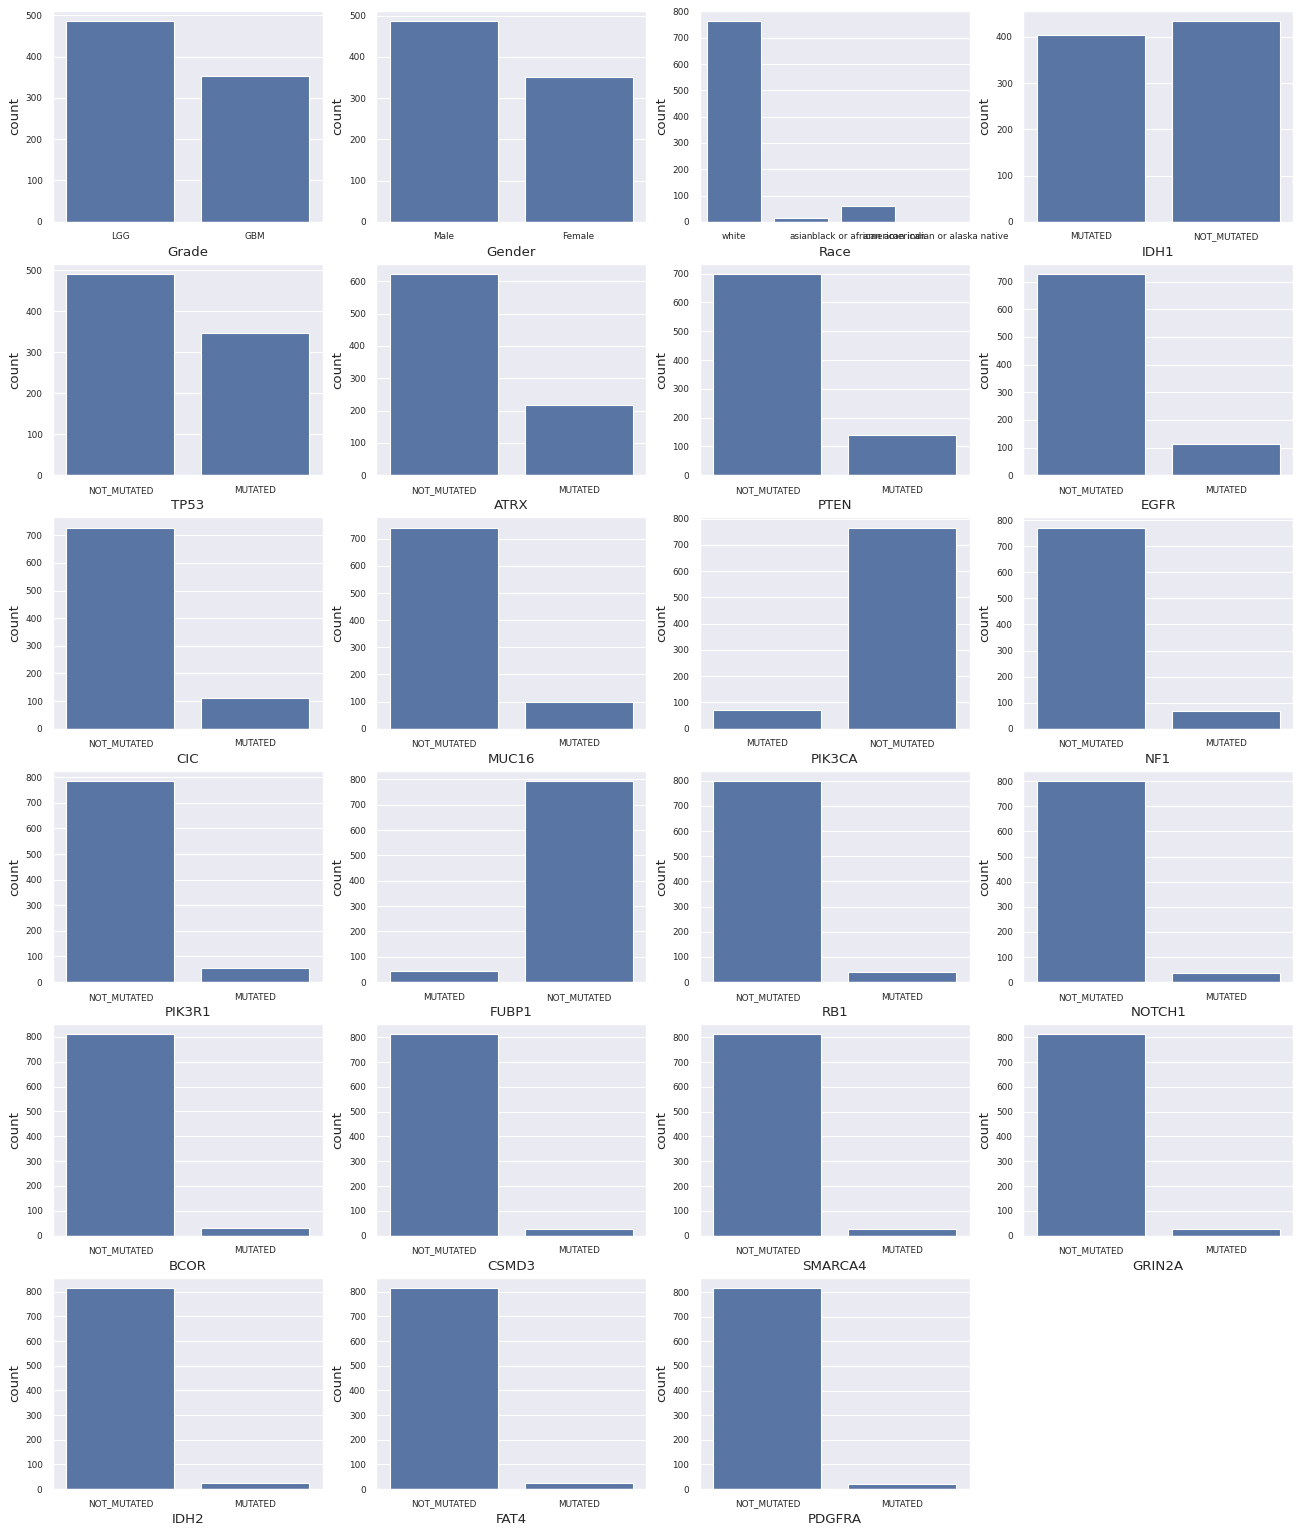

In [245]:
plt.figure(figsize=(20,24), dpi= 80)

columns = list(TCGA_GBM_LGG_Mutations_all.columns)
columns.remove('Age_at_diagnosis')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

for i in range(len(columns)):
    plt.subplot(6, 4, i+1)
    sns.countplot(x=TCGA_GBM_LGG_Mutations_all[columns[i]])

<Axes: xlabel='count', ylabel='Race'>

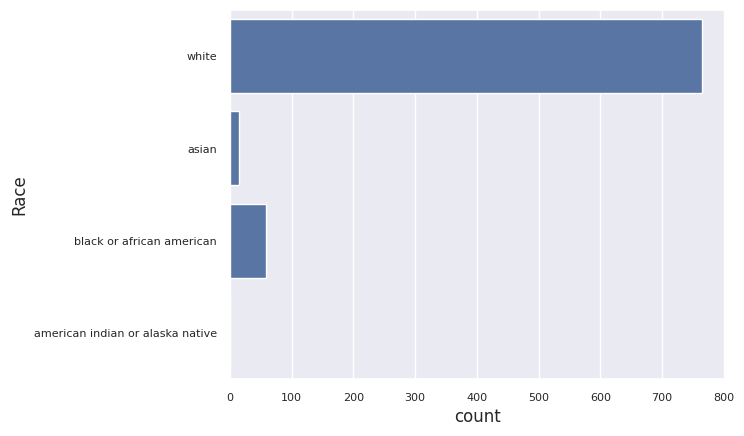

In [246]:
sns.countplot(y=TCGA_GBM_LGG_Mutations_all['Race'])

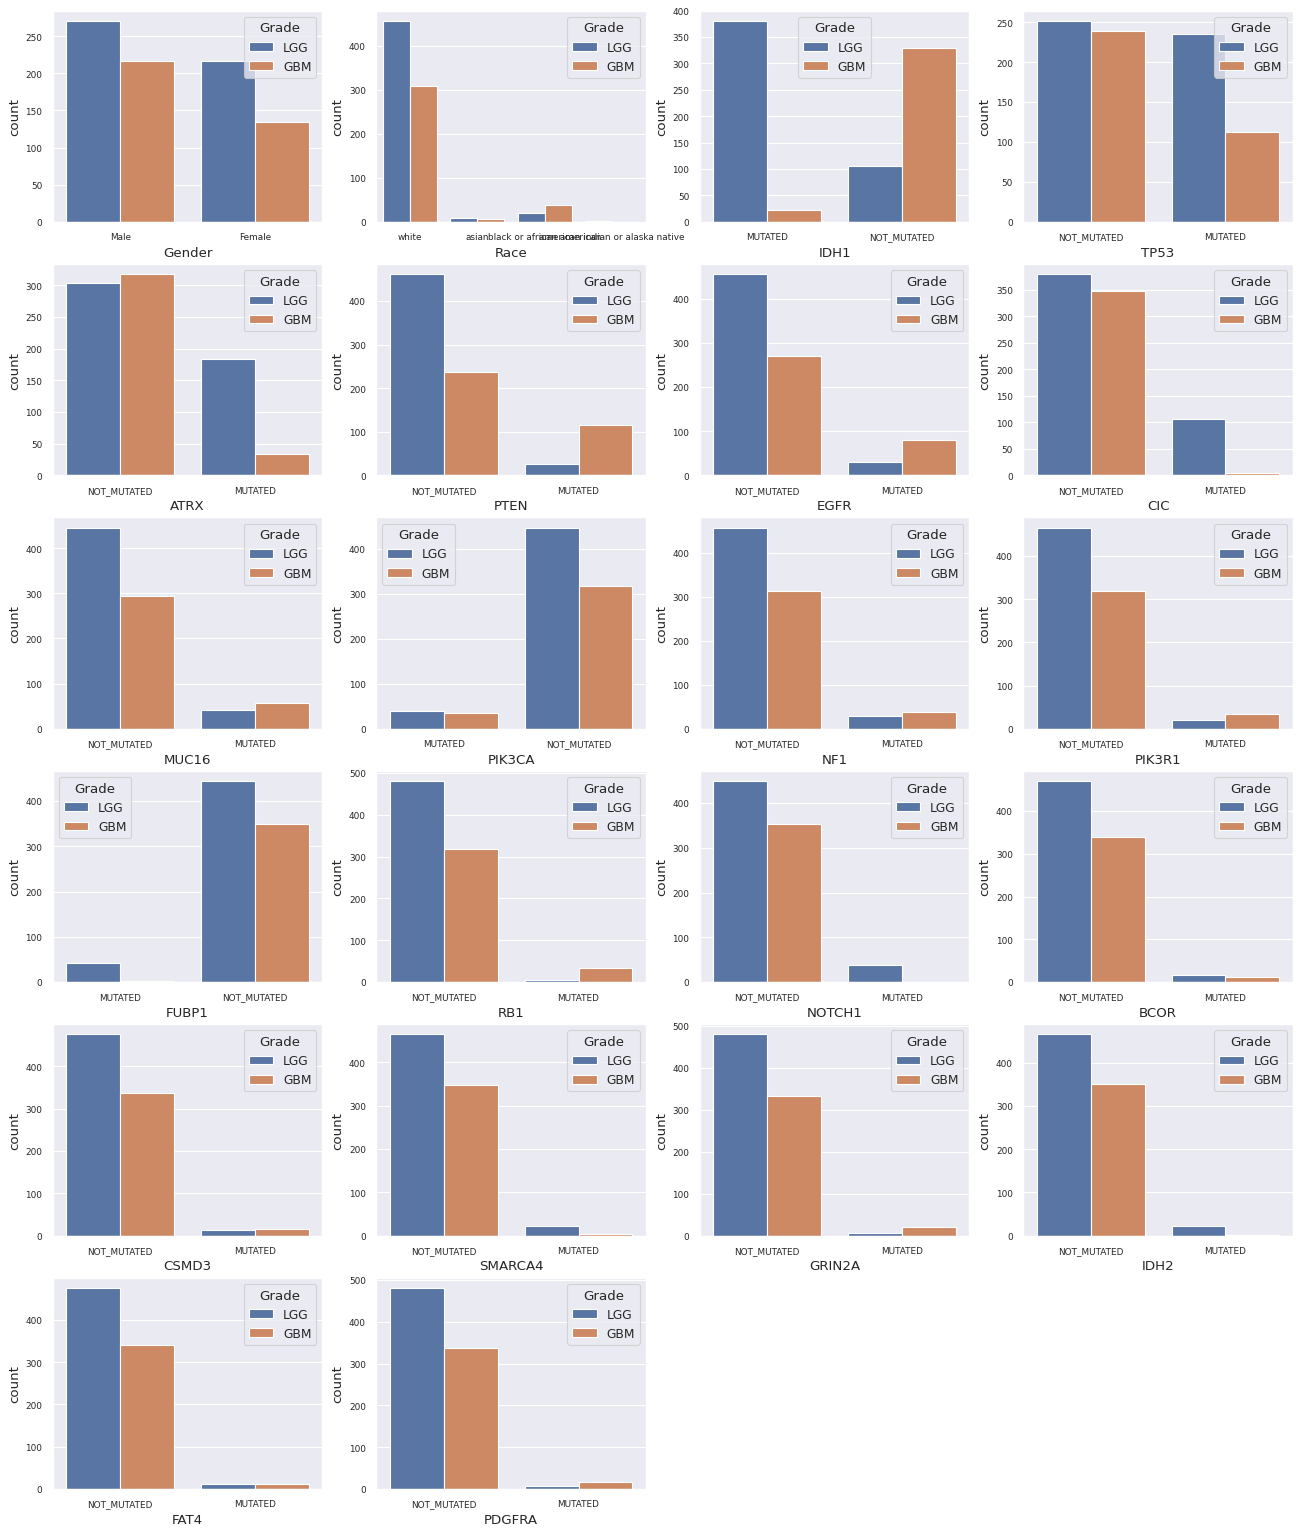

In [247]:
plt.figure(figsize=(20,24), dpi= 80)

columns = list(TCGA_GBM_LGG_Mutations_all.columns)
columns.remove('Age_at_diagnosis')
columns.remove('Grade')

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

for i in range(len(columns)):
    plt.subplot(6, 4, i+1)
    sns.countplot(data=TCGA_GBM_LGG_Mutations_all, x=TCGA_GBM_LGG_Mutations_all[columns[i]], hue='Grade')

<Axes: >

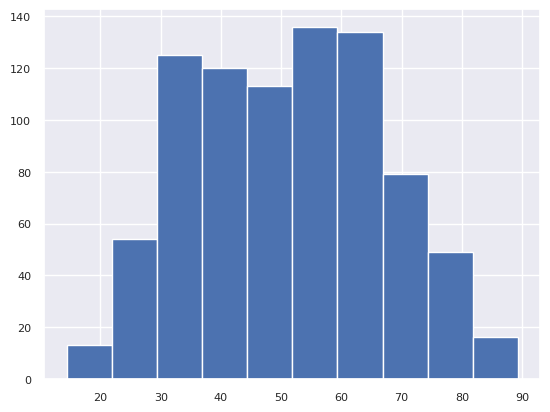

In [248]:
TCGA_InfoWithGrade.Age_at_diagnosis.hist()

0 - LGG
1 - GBM


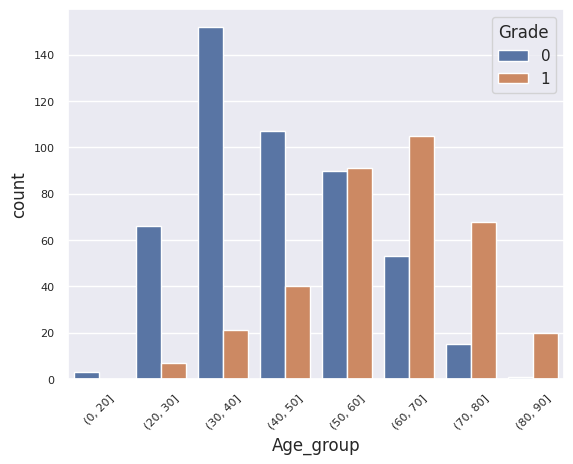

In [249]:
TCGA_InfoWithGrade["Age_group"] = pd.cut(x=TCGA_InfoWithGrade.Age_at_diagnosis, bins=[0, 20, 30, 40, 50, 60, 70, 80, 90])
plt.xticks(rotation=45)
sns.countplot(data=TCGA_InfoWithGrade, hue='Grade', x='Age_group')
print(0, '- LGG')
print(1, '- GBM')

TCGA_InfoWithGrade = TCGA_InfoWithGrade.drop('Age_group', axis=1)

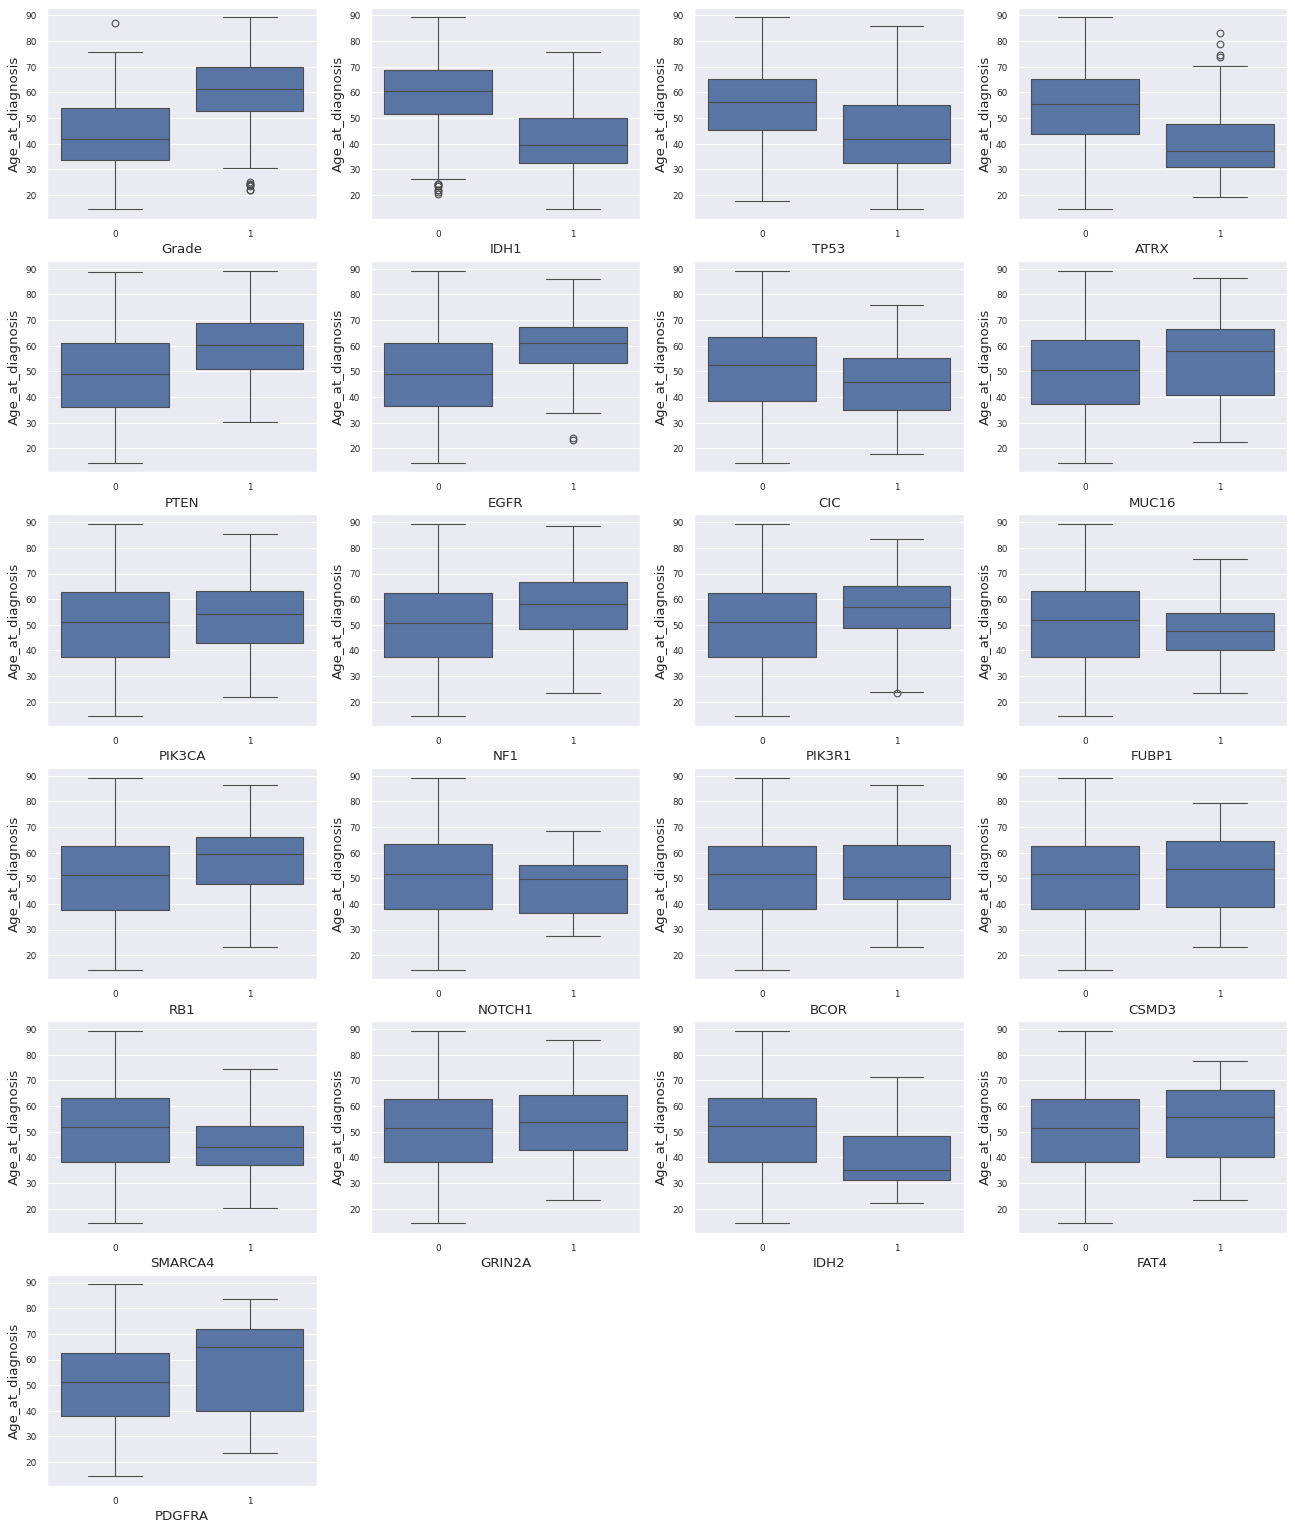

In [250]:
plt.figure(figsize=(20,24), dpi= 80)

columns = list(TCGA_GBM_LGG_Mutations_all.columns)
columns.remove('Age_at_diagnosis')
columns.remove('Gender')
columns.remove('Race')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

for i in range(len(columns)):
    plt.subplot(6, 4, i+1)
    sns.boxplot(data=TCGA_InfoWithGrade, y='Age_at_diagnosis', x=columns[i])

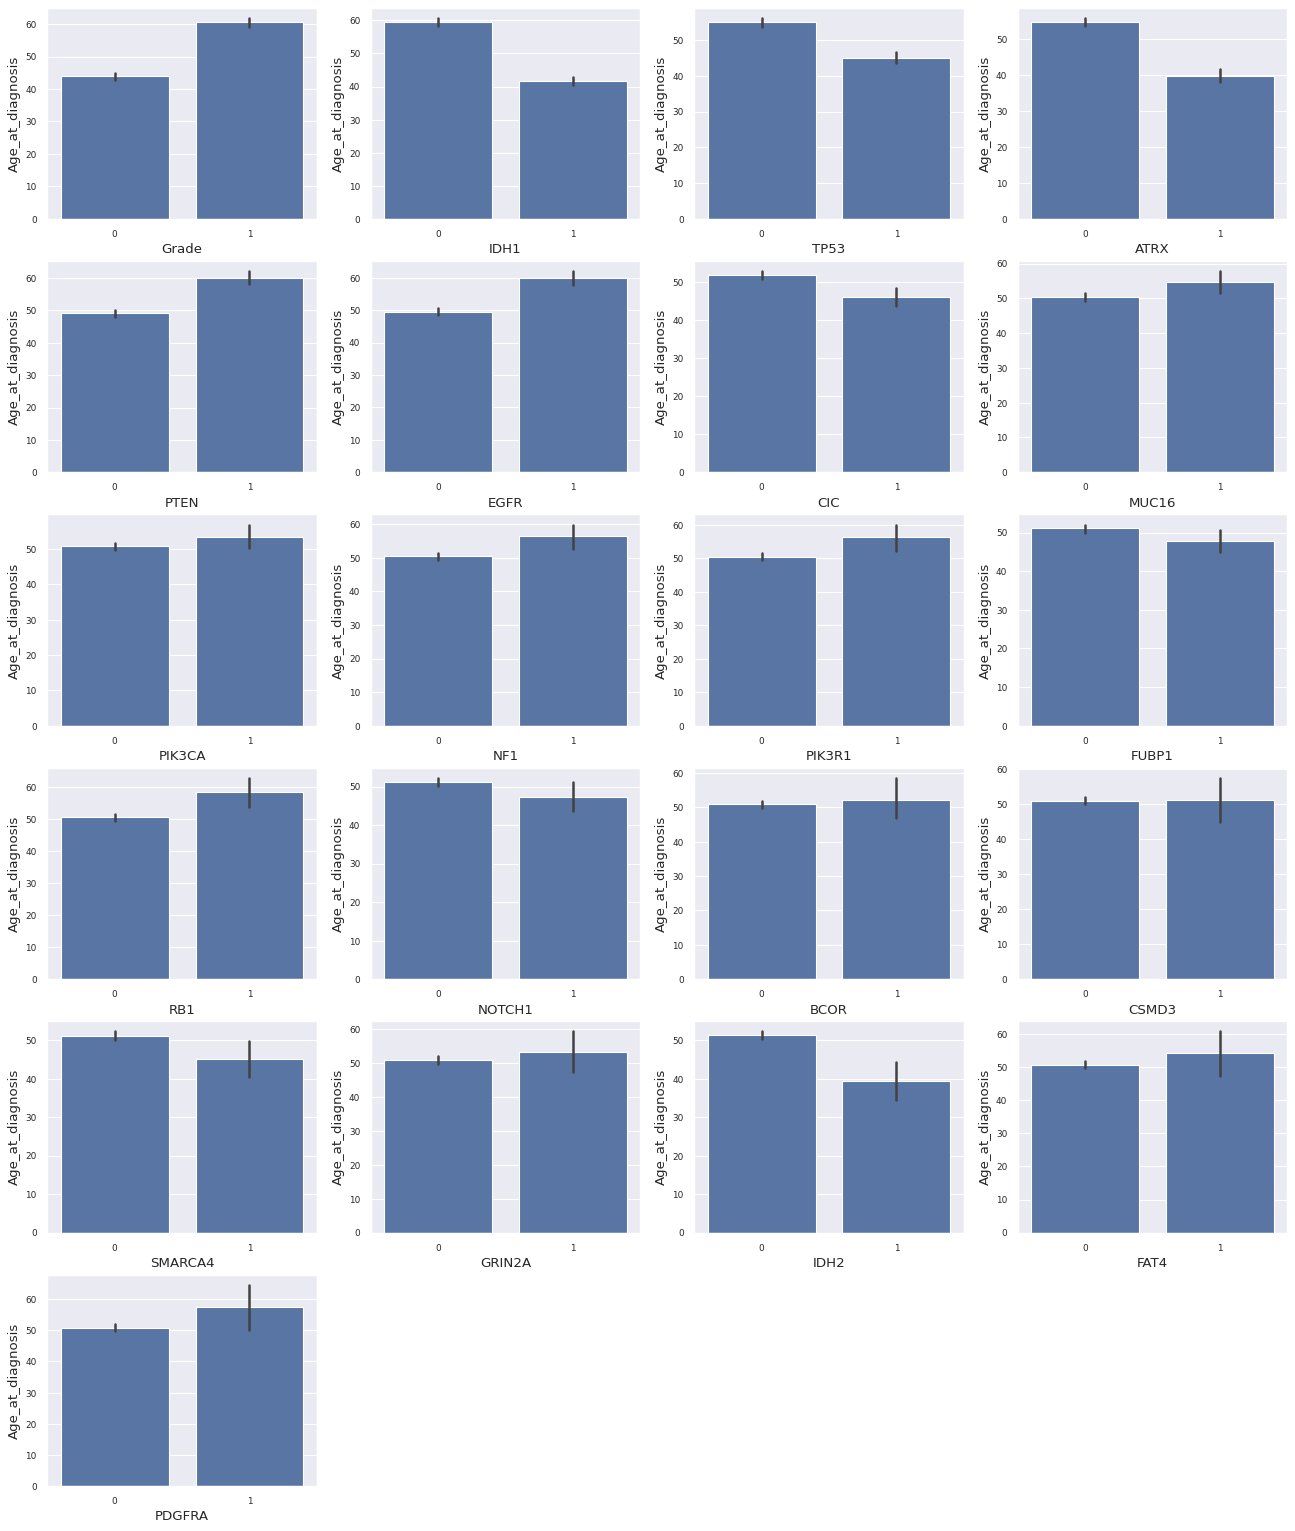

In [251]:
plt.figure(figsize=(20,24), dpi= 80)

columns = list(TCGA_GBM_LGG_Mutations_all.columns)
columns.remove('Age_at_diagnosis')
columns.remove('Gender')
columns.remove('Race')
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

for i in range(len(columns)):
    plt.subplot(6, 4, i+1)
    sns.barplot(data=TCGA_InfoWithGrade, y='Age_at_diagnosis', x=columns[i])

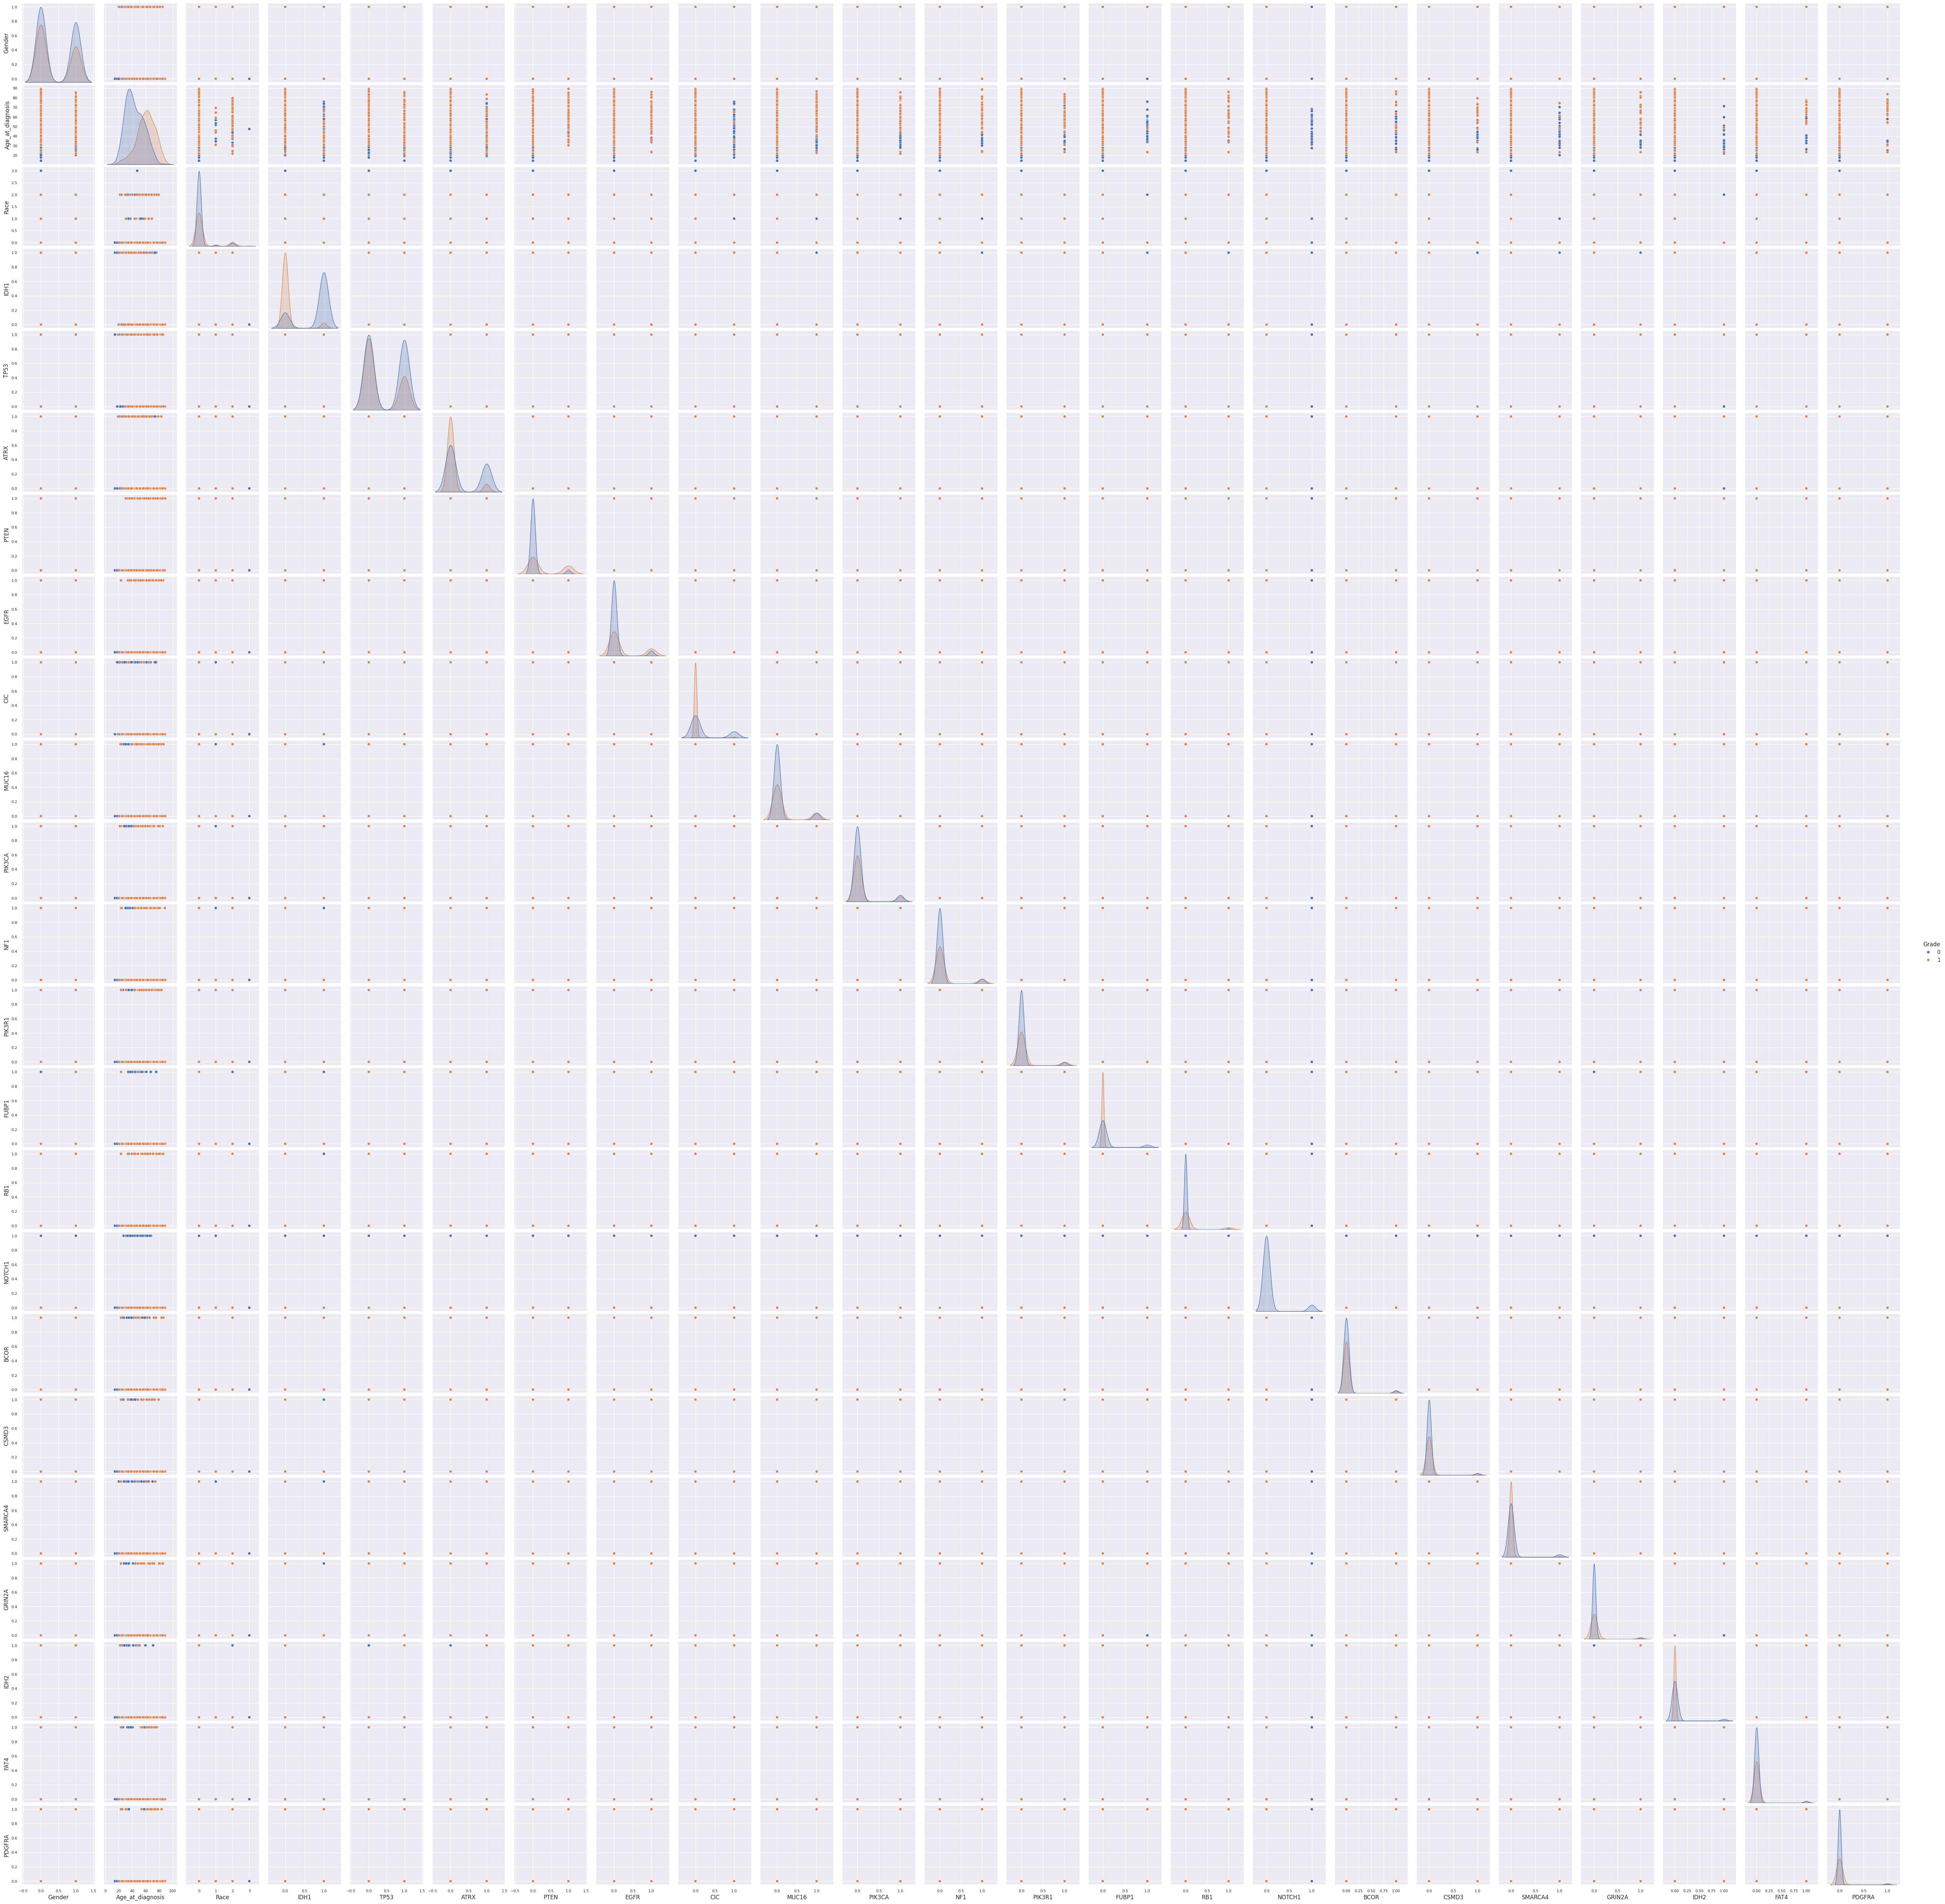

In [252]:
sns.pairplot(TCGA_InfoWithGrade, kind="scatter", hue="Grade")

<Axes: >

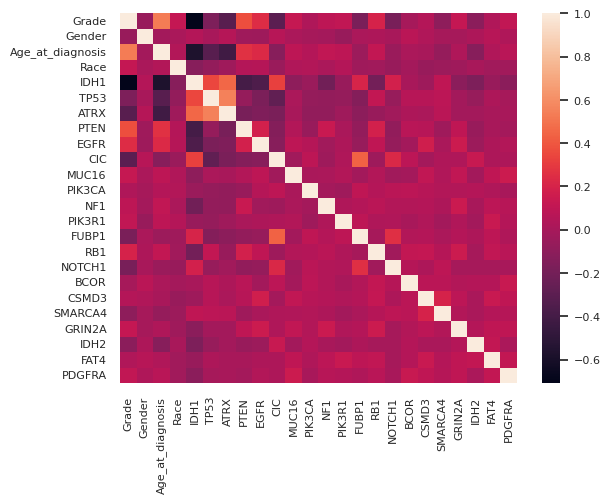

In [253]:
for column in TCGA_InfoWithGrade:
  TCGA_InfoWithGrade[column].astype(float)

sns.heatmap(TCGA_InfoWithGrade.corr())